In [1]:
import py_tiamat
import numpy
import scipy.linalg
from matplotlib import pyplot
from tqdm import tqdm

In [2]:
py_tiamat.generate_d2s([3,3])

[9, 18, 9]

In [3]:
py_tiamat.gen_cycles_for_perm([0,2,1,3,6,5,4])

[[0], [1, 2], [3], [4, 6], [5]]

In [4]:
py_tiamat.make_cycles_mat(2)

[[[[0], [1]], [[0, 1]]], [[[0, 1]], [[0], [1]]]]

In [5]:
ngs, perms, norms = py_tiamat.generate_uniform_states(4,3,[4,4])

In [6]:
ngs

array([[[0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0]],

       ...,

       [[2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2]]], dtype=uint64)

In [7]:
perms

array([0, 1, 2, ..., 3, 4, 5], dtype=uint64)

In [8]:
norms

array([4096., 4096., 4096., ..., 4096., 4096., 4096.])

In [9]:
len(norms)

4374

In [10]:
overlap = py_tiamat.make_uniform_perm_overlap_matrix(4,3,[4,4])
overlap.shape

(4374, 4374)

In [11]:
eigs = numpy.linalg.eigvalsh(overlap)
eigs

array([-0.50195313, -0.50195313, -0.50195313, ...,  1.00390625,
        1.01174927,  1.01174927])

In [12]:
len(eigs[eigs>0.988])

750

In [13]:
(3*2*1) * (5**3)

750

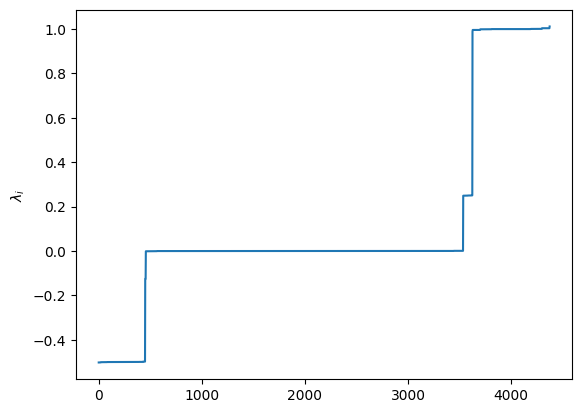

In [14]:
pyplot.plot(eigs)
pyplot.ylabel(r'$\lambda_i$')
pyplot.show()

In [15]:
eigs[eigs<0.988]

array([-0.50195313, -0.50195313, -0.50195313, ...,  0.25065175,
        0.25065175,  0.25114151])

# Mixed

In [16]:
ngs, perms, norms = py_tiamat.generate_states(4,3,[6,6])

In [17]:
norms.shape

(26244,)

In [18]:
all_eigs = []
n_sectors = [[na,nb,nc] for na in range(5) for nb in range(5) for nc in range(5)]

for nsector in tqdm(n_sectors):
    overlap_mat = py_tiamat.make_overlap_matrix(4,3,[6,6],n_sector=nsector)
    eigs = numpy.linalg.eigvalsh(overlap_mat)
    all_eigs.append(eigs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [00:03<00:00, 38.59it/s]


In [19]:
flat_eigs = numpy.array([x for xs in all_eigs for x in xs])

In [20]:
len(flat_eigs[flat_eigs>0.9])

750

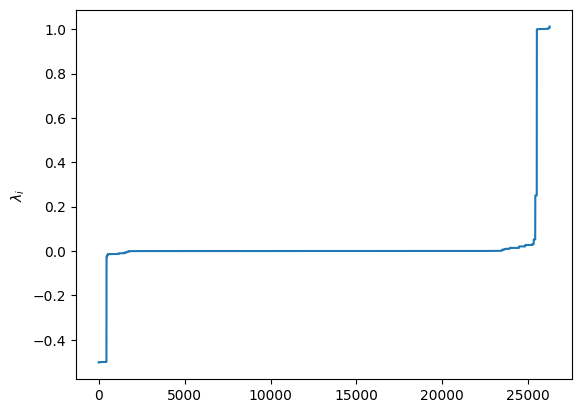

In [21]:
pyplot.plot(sorted(flat_eigs))
pyplot.ylabel(r'$\lambda_i$')
pyplot.show()

# Orthogonal

In [5]:
all_eigs = []
n_sectors = [[na,nb,nc] for na in range(5) for nb in range(5) for nc in range(5)]

for nsector in tqdm(n_sectors):
    overlap_mat = py_tiamat.make_ortho_overlap_matrix(4,3,[2,2],n_sector=nsector)
    eigs = numpy.linalg.eigvalsh(overlap_mat)
    all_eigs.append(eigs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [00:05<00:00, 22.44it/s]


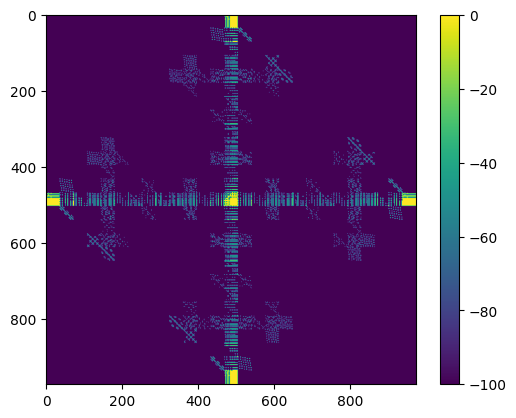

In [43]:
overlap_mat = py_tiamat.make_ortho_overlap_matrix(4,3,[2,2],n_sector=(2,2,2))
abs_overlap = numpy.abs(overlap_mat)
abs_overlap[abs_overlap < 1e-12] = -100
pyplot.imshow(abs_overlap, interpolation=None)
pyplot.colorbar()

In [25]:
numpy.abs(overlap_mat).min()

0.0

In [48]:
flat_eigs = numpy.array([x for xs in all_eigs for x in xs])

In [49]:
len(flat_eigs[flat_eigs>0.9999])

750

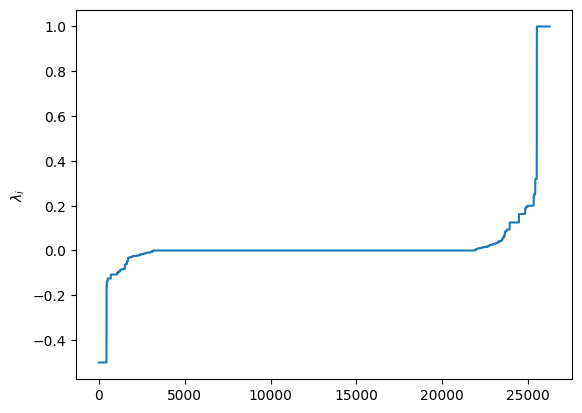

In [50]:
pyplot.plot(sorted(flat_eigs))
pyplot.ylabel(r'$\lambda_i$')
pyplot.show()

# General Eigenvalue Problem

In [7]:
all_eigs = []
n_sectors = [[na,nb,nc] for na in range(5) for nb in range(5) for nc in range(5)]

for nsector in tqdm(n_sectors):
    overlap_mat = py_tiamat.make_overlap_matrix(4,3,[1,1],n_sector=nsector)
    self_overlaps = py_tiamat.gen_self_overlap_matrix(4,3,[1,1],n_sector=nsector)
    eigs = scipy.linalg.eigh(overlap_mat, b=self_overlaps,eigvals_only=True)
    all_eigs.append(eigs)

  0%|                                                   | 0/125 [00:00<?, ?it/s]


LinAlgError: The leading minor of order 2 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.

# QR Decomp

In [22]:
ngs, perms, _ = py_tiamat.generate_states(4,3,[1,1])

In [23]:
ngs.shape

(26244, 2, 3)

In [24]:
all_eigs = []
n_sectors = [[na,nb,nc] for na in range(5) for nb in range(5) for nc in range(5)]

nonzero_diags = 0
for nsector in tqdm(n_sectors):
    self_overlaps = py_tiamat.gen_self_overlap(4,3,[1,1],n_sector=nsector)
    for _, self_overlap in self_overlaps:
        _, r = numpy.linalg.qr(self_overlap)
        d = numpy.diag(r)
        nonzero_d = numpy.sum(numpy.abs(d) > 1e-12)
        nonzero_diags += nonzero_d

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 281.14it/s]


In [25]:
nonzero_diags

13225

In [26]:
all_overlaps = py_tiamat.gen_self_overlap(4,3,[1,1])
len(all_overlaps)

729

In [27]:
sorted(all_overlaps, key=lambda x: tuple(x[0].flatten()))

[(array([[0, 0, 0],
         [0, 0, 0]], dtype=uint64),
  array([[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]])),
 (array([[0, 0, 0],
         [0, 0, 1]], dtype=uint64),
  array([[1., 1., 1., ..., 0., 0., 0.],
         [1., 1., 1., ..., 0., 0., 0.],
         [1., 1., 1., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.]])),
 (array([[0, 0, 0],
         [0, 0, 2]], dtype=uint64),
  array([[1., 1., 1., ..., 0., 0., 0.],
         [1., 1., 1., ..., 0., 0., 0.],
         [1., 1., 1., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.]])),
 (array([[0, 0, 0],
         [0, 1, 0]], dtype=uint64),
  arr

In [28]:
ranks = [numpy.linalg.matrix_rank(b) for _,b in all_overlaps]

In [29]:
ranks

[6,
 3,
 36,
 18,
 9,
 36,
 18,
 30,
 18,
 18,
 18,
 36,
 1,
 36,
 3,
 36,
 36,
 18,
 18,
 9,
 18,
 30,
 18,
 3,
 18,
 18,
 18,
 15,
 36,
 9,
 18,
 9,
 9,
 18,
 18,
 9,
 18,
 9,
 18,
 9,
 18,
 9,
 6,
 36,
 18,
 18,
 36,
 18,
 18,
 36,
 36,
 18,
 15,
 18,
 18,
 18,
 36,
 18,
 36,
 18,
 3,
 18,
 18,
 18,
 30,
 18,
 18,
 36,
 36,
 9,
 15,
 6,
 18,
 9,
 36,
 18,
 3,
 3,
 18,
 36,
 18,
 36,
 36,
 6,
 36,
 9,
 18,
 36,
 18,
 18,
 9,
 9,
 3,
 9,
 36,
 18,
 9,
 9,
 18,
 9,
 36,
 36,
 9,
 6,
 18,
 18,
 18,
 3,
 9,
 18,
 18,
 18,
 18,
 3,
 18,
 18,
 18,
 18,
 18,
 36,
 30,
 9,
 30,
 18,
 5,
 9,
 9,
 15,
 36,
 36,
 9,
 36,
 18,
 3,
 9,
 36,
 18,
 9,
 9,
 36,
 18,
 18,
 18,
 18,
 36,
 9,
 18,
 18,
 36,
 5,
 18,
 36,
 18,
 9,
 15,
 9,
 36,
 36,
 18,
 36,
 9,
 3,
 30,
 9,
 36,
 18,
 18,
 18,
 30,
 9,
 3,
 18,
 18,
 18,
 6,
 9,
 9,
 18,
 15,
 30,
 15,
 15,
 36,
 9,
 6,
 18,
 36,
 9,
 18,
 18,
 18,
 36,
 30,
 18,
 36,
 6,
 3,
 3,
 9,
 18,
 3,
 9,
 3,
 18,
 18,
 9,
 18,
 6,
 18,
 18,
 3,
 18,
 18,
 18,

In [30]:
sum(ranks)

13225

array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6.])

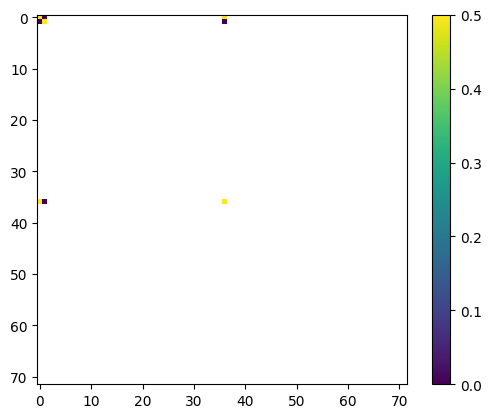

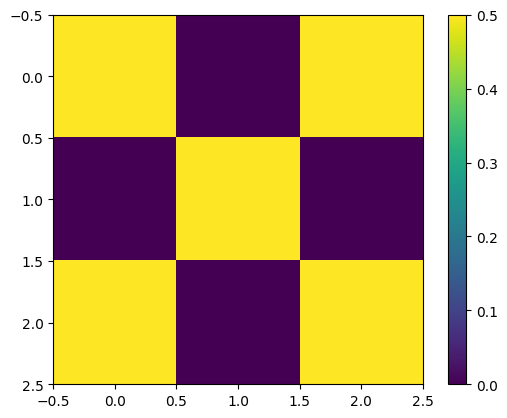

array([0. , 0.5, 1. ])

In [87]:
nsector = [0,0,1]

overlap_mat = py_tiamat.make_ortho_overlap_matrix(4,3,[1,1],n_sector=nsector)
indep_set = numpy.logical_not(numpy.isnan(overlap_mat).all(axis=0))
pyplot.imshow(overlap_mat, interpolation='nearest')
pyplot.colorbar()
pyplot.show()

pyplot.imshow(overlap_mat[indep_set,:][:,indep_set], interpolation='nearest')
pyplot.colorbar()
pyplot.show()

numpy.linalg.eigvalsh(overlap_mat[indep_set,:][:,indep_set])

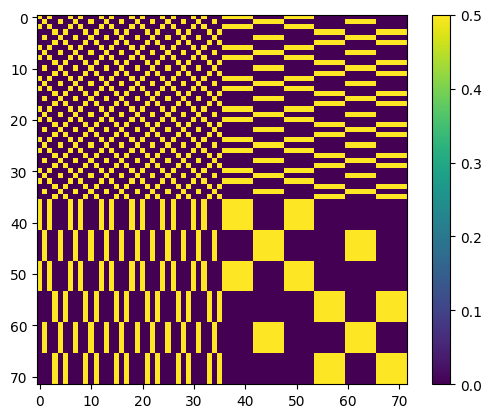

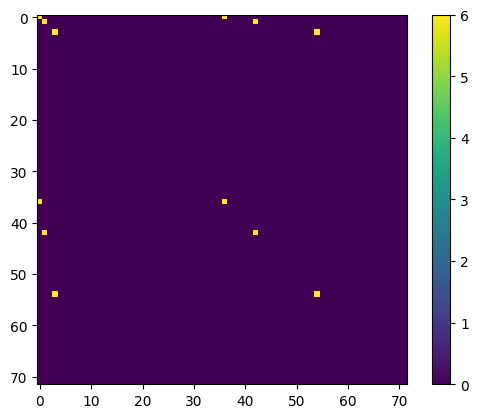

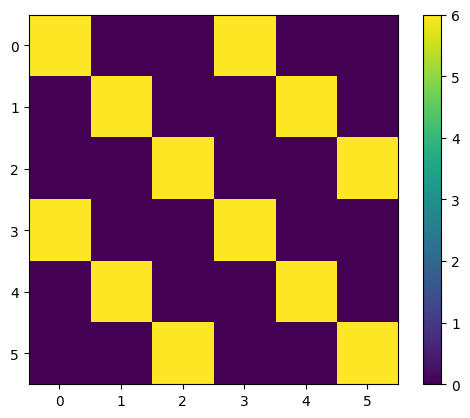

[-4.10038428e-15 -3.28952818e-15 -2.51240331e-15 -3.31854577e-16
 -1.89954476e-16 -1.38503687e-16 -1.04195394e-16 -7.72541058e-17
 -5.30146331e-17 -3.38095860e-17 -1.73824853e-17 -1.06685988e-17
 -8.33669085e-18 -4.21485640e-18 -3.82239239e-18 -2.25655096e-18
 -4.33346502e-19 -1.29751440e-30 -2.43777342e-31 -5.42565550e-32
 -4.05383344e-32 -3.17847889e-32 -2.31884074e-32 -2.03931361e-32
 -1.22843209e-32 -8.95769609e-33 -8.52234958e-33 -4.41771934e-33
 -3.88238125e-33 -2.22079689e-33 -1.69967885e-33 -1.00821596e-33
 -2.45223314e-34 -6.41463530e-50  4.22369823e-34  1.17415513e-33
  1.38009203e-33  3.45466044e-33  4.81952942e-33  6.80165910e-33
  9.12922436e-33  1.08191413e-32  1.34366767e-32  1.56500130e-32
  2.15373796e-32  3.14061204e-32  4.69160934e-32  7.14472055e-32
  1.14822581e-31  1.35102119e-19  3.49246034e-19  1.38921901e-18
  2.28293218e-18  3.47888900e-18  5.60707520e-18  6.85921392e-18
  1.46831116e-17  2.09808960e-17  2.53494235e-17  3.73292692e-17
  5.78492260e-17  6.30137

array([-4.4408921e-16,  4.4408921e-16,  8.8817842e-16,  1.2000000e+01,
        1.2000000e+01,  1.2000000e+01])

In [88]:
nsector = [0,0,1]

overlap_mat = py_tiamat.make_overlap_matrix(4,3,[1,1],n_sector=nsector)
self_overlap = py_tiamat.gen_self_overlap_matrix(4,3,[1,1],n_sector=nsector)
q, r = numpy.linalg.qr(self_overlap, mode='complete')
indep_set = numpy.abs(numpy.diag(r)) > 1e-12

pyplot.imshow(overlap_mat, interpolation='nearest')
pyplot.colorbar()
pyplot.show()

pyplot.imshow(q.T @ overlap_mat @ q, interpolation='nearest')
pyplot.colorbar()
pyplot.show()

pyplot.imshow((q.T @ overlap_mat @ q)[indep_set,:][:,indep_set], interpolation='nearest')
pyplot.colorbar()
pyplot.show()


print(numpy.linalg.eigvalsh(overlap_mat))
numpy.linalg.eigvalsh((q.T @ overlap_mat @ q)[indep_set,:][:,indep_set])

In [28]:
all_eigs = []
n_sectors = [[na,nb,nc] for na in range(5) for nb in range(5) for nc in range(5)]

for nsector in tqdm(n_sectors):
    overlap_mat = py_tiamat.make_overlap_matrix(4,3,[1,1],n_sector=nsector)
    self_overlap = py_tiamat.gen_self_overlap_matrix(4,3,[1,1],n_sector=nsector)
    q, r = numpy.linalg.qr(self_overlap)
    indep_set = numpy.abs(numpy.diag(r)) > 1e-12

    sub_self_overlap = self_overlap[indep_set, :][:, indep_set]
    eigs = numpy.linalg.eigvalsh(sub_self_overlap)
    all_eigs.append(eigs)

100%|█████████████████████████████████████████| 125/125 [00:04<00:00, 25.71it/s]


In [29]:
flat_eigs = numpy.array([x for xs in all_eigs for x in xs])

In [30]:
len(flat_eigs[flat_eigs>0.9999])

8799